['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', 'her', 'hers', 'herself', 'it', 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', 'should', 'no

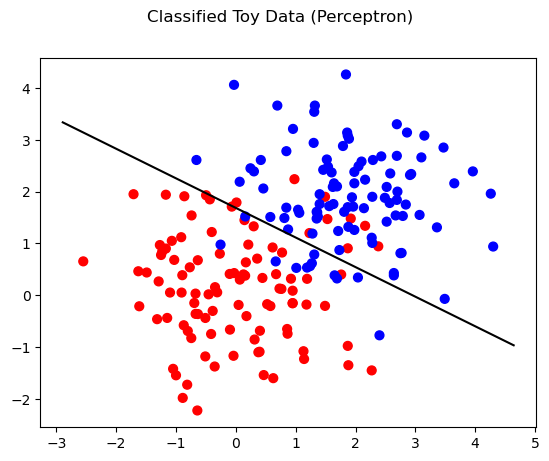

theta for Average Perceptron is 3.8615468785446034, 3.898118649199404
theta_0 for Average Perceptron is -7.0714955


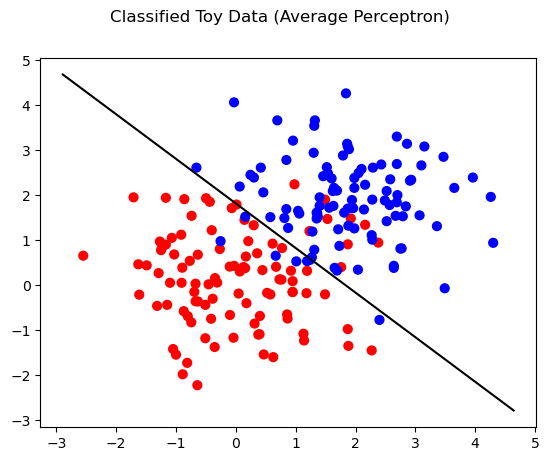

theta for Pegasos is 0.6499940747976393, 0.6036927763627459
theta_0 for Pegasos is -1.2368593909880747


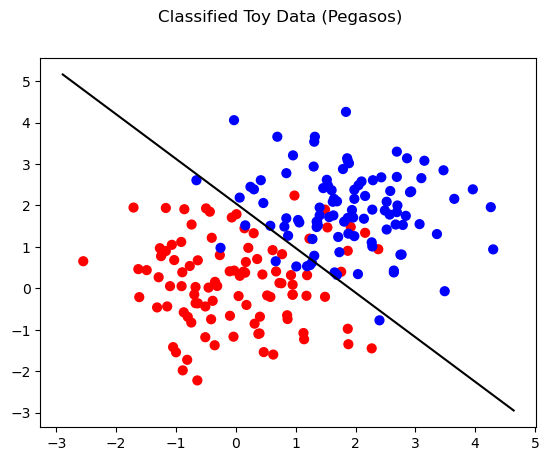

In [5]:
import project1 as p1
import utils
import numpy as np

#-------------------------------------------------------------------------------
# Data loading. There is no need to edit code in this section.
#-------------------------------------------------------------------------------

train_data = utils.load_data('reviews_train.tsv')
val_data = utils.load_data('reviews_val.tsv')
test_data = utils.load_data('reviews_test.tsv')

train_texts, train_labels = zip(*((sample['text'], sample['sentiment']) for sample in train_data))
val_texts, val_labels = zip(*((sample['text'], sample['sentiment']) for sample in val_data))
test_texts, test_labels = zip(*((sample['text'], sample['sentiment']) for sample in test_data))

dictionary = p1.bag_of_words(train_texts)

train_bow_features = p1.extract_bow_feature_vectors(train_texts, dictionary)
val_bow_features = p1.extract_bow_feature_vectors(val_texts, dictionary)
test_bow_features = p1.extract_bow_feature_vectors(test_texts, dictionary)

#-------------------------------------------------------------------------------
# Problem 5
#-------------------------------------------------------------------------------

toy_features, toy_labels = toy_data = utils.load_toy_data('toy_data.tsv')

T = 10000
L = 0.2

thetas_perceptron = p1.perceptron(toy_features, toy_labels, T)
thetas_avg_perceptron = p1.average_perceptron(toy_features, toy_labels, T)
thetas_pegasos = p1.pegasos(toy_features, toy_labels, T, L)

def plot_toy_results(algo_name, thetas):
    print('theta for', algo_name, 'is', ', '.join(map(str,list(thetas[0]))))
    print('theta_0 for', algo_name, 'is', str(thetas[1]))
    utils.plot_toy_data(algo_name, toy_features, toy_labels, thetas)

plot_toy_results('Perceptron', thetas_perceptron)
plot_toy_results('Average Perceptron', thetas_avg_perceptron)
plot_toy_results('Pegasos', thetas_pegasos)

In [2]:
def perceptron(features, labels, T):
    theta = np.zeros(features.shape[1])
    theta_0 = 0
    convergence_threshold = 0.1
    converged = False
    
    for t in range(T):
        theta_prev = theta.copy()
        theta_0_prev = theta_0
        
        for i in range(len(features)):
            if labels[i] * (np.dot(theta, features[i]) + theta_0) <= 0:
                theta = theta + labels[i] * features[i]
                theta_0 = theta_0 + labels[i]
        
        # Check for convergence
        if np.max(np.abs(theta - theta_prev)) < convergence_threshold and np.abs(theta_0 - theta_0_prev) < convergence_threshold:
            converged = True
            print(f"Perceptron converged at iteration {t}")
            break
    
    return theta, theta_0, converged


In [3]:
def average_perceptron(features, labels, T):
    theta = np.zeros(features.shape[1])
    theta_0 = 0
    theta_sum = np.zeros(features.shape[1])
    theta_0_sum = 0
    convergence_threshold = 0.1
    updates = 0
    converged = False
    
    for t in range(T):
        theta_prev = theta.copy()
        theta_0_prev = theta_0
        
        for i in range(len(features)):
            if labels[i] * (np.dot(theta, features[i]) + theta_0) <= 0:
                theta = theta + labels[i] * features[i]
                theta_0 = theta_0 + labels[i]
            theta_sum += theta
            theta_0_sum += theta_0
            updates += 1
            
        # Check for convergence
        if np.max(np.abs(theta - theta_prev)) < convergence_threshold and np.abs(theta_0 - theta_0_prev) < convergence_threshold:
            converged = True
            print(f"Average Perceptron converged at iteration {t}")
            break
    
    return theta_sum / updates, theta_0_sum / updates, converged


In [4]:
def pegasos(features, labels, T, L):
    theta = np.zeros(features.shape[1])
    theta_0 = 0
    convergence_threshold = 0.1
    converged = False
    
    for t in range(1, T + 1):
        theta_prev = theta.copy()
        theta_0_prev = theta_0
        
        for i in range(len(features)):
            eta = 1 / (L * t)
            if labels[i] * (np.dot(theta, features[i]) + theta_0) <= 1:
                theta = (1 - eta * L) * theta + eta * labels[i] * features[i]
                theta_0 = theta_0 + eta * labels[i]
            else:
                theta = (1 - eta * L) * theta
        
        # Check for convergence
        if np.max(np.abs(theta - theta_prev)) < convergence_threshold and np.abs(theta_0 - theta_0_prev) < convergence_threshold:
            converged = True
            print(f"Pegasos converged at iteration {t}")
            break
    
    return theta, theta_0, converged
